2.6 타이타닉 실습


In [5]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# 데이터 탐색
print(data.head())
print(data.info())

# 데이터 전처리
# 필요 없는 컬럼 삭제
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# 결측치 처리 (Embarked의 결측치는 'S'로 채우고 Age는 평균값으로 채운다)
data['Embarked'].fillna('S', inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)

# 범주형 변수 인코딩
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# 피처와 레이블 분리
X = data.drop(columns=['Survived'])
y = data['Survived']

# 데이터셋 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 훈련
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

<ipython-input-5-32864564de1a>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna('S', inplace=True)
<ipython-input-5-32864564de1a>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

<ipython-input-6-8d9ce6e3107b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex_male', y='Survived', data=survival_rates, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


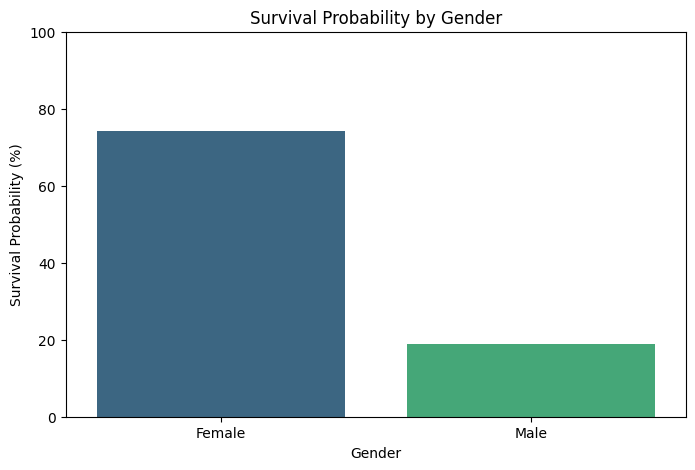

In [6]:
# 성별에 따른 생존 확률 계산
survival_rates = data.groupby('Sex_male')['Survived'].mean().reset_index()
survival_rates['Survived'] = survival_rates['Survived'] * 100  # 백분율로 변환

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex_male', y='Survived', data=survival_rates, palette='viridis')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Survival Probability by Gender')
plt.ylabel('Survival Probability (%)')
plt.xlabel('Gender')
plt.ylim(0, 100)
plt.show()

<ipython-input-7-85ba791eed14>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=survival_rates, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

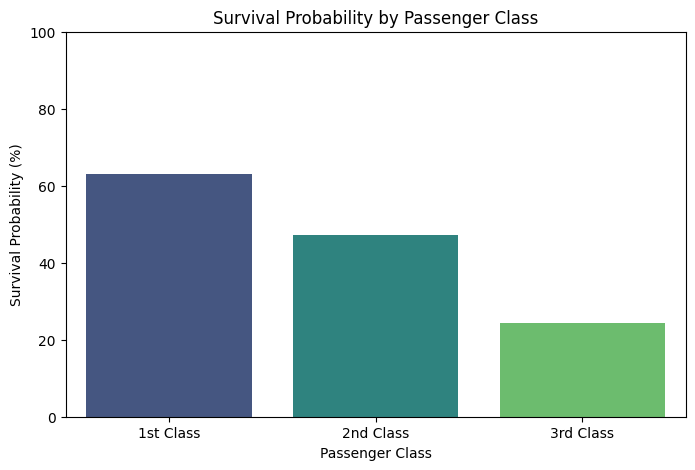

In [7]:
# 좌석 등급에 따른 생존 확률 계산
survival_rates = data.groupby('Pclass')['Survived'].mean().reset_index()
survival_rates['Survived'] = survival_rates['Survived'] * 100  # 백분율로 변환

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=survival_rates, palette='viridis')
plt.title('Survival Probability by Passenger Class')
plt.ylabel('Survival Probability (%)')
plt.xlabel('Passenger Class')
plt.ylim(0, 100)
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

3.6 피마인디언 당뇨병예측 실습


---



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)

# 데이터 탐색
print(data.head())
print(data.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [10]:
# 결측치 처리 (0으로 대체)
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

# 피처와 레이블 분리
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 훈련
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')



Accuracy: 0.7532
